# CAMEROON CORONA VIRUS DATA ANALYSIS USING PYTHON

##### This Code helps us to understand COVID-19-CAMEROON-Data, data analysis, making decision base on statistical analysis, data analysis technique, machine learning and artificial intelligence 
#### **Other:** Blondel Kenne  
#### **Companie:** kenneelectric llc, **website:** www.kenneelectric.com
#### **tilte:**  Data scientist  
#### **date:** 4 - 20 - 2020 
#### **Address**
#### **Branche 1:** 10130-204 douglas oaks cir Tampa FL 33610 USA
#### **Branche 2:** 216 Rue Albert Ebe Nlonkak Yaounde-Cameroon
#### **Tel:** 0018562783591/ **CM:** 653180085
#### **email:**k.electric@kenneelectric.com 

# TIME DEPENDENT MODEL SIR-COVID-19-CAMEROON
##### Population Change Over Time

# Definition and Term
We take all people in Cameroon and divide them into 3 groupes


# susceptible S(t):
All people in Cameroon Capable of becomming sick from the COVID-19
# Infected I(t):
All people in Cameroon infected by the COVID-19(when infected you get it only one time and live the susceptible population
# Recorvered R(t):
All people in Cameroon that recovered or died from COVID-19( can not be reinfected and give to others).Recovered groupe was infected and transition to recovered status to fully recovered or died
# System of differential equation
we want to know the rate of change of each groupe 
# dS/dt: 
how the number of susceptible is changing over time.Depend on probability of proximity between individual(interaction or likelyhood of interaction
# dI/dt: 
how the number of infection is changing over time. S transit to I to get infected
# dR/dt: 
how the number of recorvered is changing over time
# Reproductive rate or degree of spraidability(Rr0): 
it is how much can one person infect (secondary infection) others. it is the number of new cases that existing cases generates on average over the infection perode in the susceptible population.
# (Rr0 = (a/b) x S0 = S0 x q  ) 
# Rr0 = new cases / existing cases
# Serial intervales (SI) :
is defined as the time duration between a primary case-patient (infector) having symptom onset and a secondary case-patient (infectee) having symptom onset (2). The distribution of COVID-19 serial intervals is a critical input for determining the basic reproduction number (Rr0) and the extent of interventions required to control an epidemic(source:https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article) reference:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3057478/

# Recovered coefficient (b) :
Is is  1/number of days it takes to revover from the desease(k). 

**(1/k = b)** is the mean period of time during which an infected individual can pass it on.

# Transmition coeficient (a):
(**a**) describes the effective contact rate of the disease: an infected individual comes into contact with n other individuals per unit time (of which the fraction that are susceptible to contracting the disease is **S/N**).

**a = pq** where: 

**p:** probability of becomming in contact with didease

**q:** chance of falling ills with the disease if you are in contact

# Assumption to the Model
In mathematical modeling we have to make assumption to simplify analysis
 
 1 - Population remain constant(the disease is short)
 
 2 - Rate of infection proportional to the contact between the susceptible and infected at constant rate
 
 3- infected will fully recover or died at constant rate 
 
 #### Using COVID19-CAMEROON data,we assume that the median time from onset to clinical recovery for mild cases is approximately 2 weeks(15days) and is 3-6 weeks(42days) for patients with severe or critical disease.



# MODELLING IN PYTHON 

# CAMEROON'S CORONA VIRUS DATA  FROM 02-24-2020 T0 04-20-2020
#### source: https://www.worldometers.info/coronavirus/country/cameroon/;  https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Cameroon; https://tradingeconomics.com/cameroon/coronavirus-deaths

In [0]:
# import packages
import scipy.integrate
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

In [4]:
import os
os.getcwd()

'/content'

####   DATA SET 

In [0]:
# making series from list 
#series = pd.Series(values) 
  
date            = pd.Series( pd.date_range(start="2020-02-24",end="2020-04-20") )

daily_deaths    = pd.Series( [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0, 
                              0,1,1,1,0,0,0,1,2,0,0,0,0,2,3,0,5,20,0,0])

Total_deaths     = daily_deaths.cumsum() 

Total_recorvered = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,5,5,
                              5,5,10,17,17,17,17,60,
                              60,61,98,98,98,108,130,165,165,168,305,305,305])
  
Total_cases      = pd.Series( [1,1,1,1,1,1,1,1,1,1,1,2,
                               2,2,2,2,2,2,2,2,2,2,2,7,
                               7,27,40,0,56,66,70,88,92,113,139,142,
                               193,233,284,509,555,658,658,730,780,803, 
                               820, 820,820, 848, 848, 848,996,996,1011,1017,1017])

Daily_new_cases = pd.Series([1,0,0,0,0,0,0,0,0,0,0,1,
                             0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 5 ,
                             0,20,13,0,16,10,4,18,4,21,26,3,
                             51,40,51,225,46,0,103,72,50,73,17, 0,
                             0,28,0,0,148,0,17,6,0])

New_cases_R0 = pd.Series([1,0,0,0,0,0,0,0,0,0,0,5,
                          0,0,0,0,0,0,0,0,0,0,0,20,
                          0,13,17,0,10,4,18,4,21,26,29,51,
                          40,51,225,46,103,0,27,95,73,17,0,0,
                          28,0,0,148,0,17,6,0,0])

Active_cases     = Total_cases - (Total_recorvered + Total_deaths)

Covid_19_cameroon_data = pd.DataFrame( {'date':date, 'Total_cases':Total_cases,'Daily_new_cases':Daily_new_cases, 'New_cases_R0':New_cases_R0,'Active_cases':Active_cases,'Total_deaths':Total_deaths,
                                         'daily_deaths':daily_deaths,'Total_recorvered':Total_recorvered})

Covid_19_cameroon_data['Reproductive_ratio'] = (Covid_19_cameroon_data['New_cases_R0']/Covid_19_cameroon_data['Total_cases']).fillna(0)

In [57]:
# view data set
Covid_19_cameroon_data

,date,Total_cases,Daily_new_cases,New_cases_R0,Active_cases,Total_deaths,daily_deaths,Total_recorvered,Reproductive_ratio
0,2020-02-24,1,1,1,1,0,0,0,1.000000
1,2020-02-25,1,0,0,1,0,0,0,0.000000
2,2020-02-26,1,0,0,1,0,0,0,0.000000
3,2020-02-27,1,0,0,1,0,0,0,0.000000
4,2020-02-28,1,0,0,1,0,0,0,0.000000
5,2020-02-29,1,0,0,1,0,0,0,0.000000
6,2020-03-01,1,0,0,1,0,0,0,0.000000
7,2020-03-02,1,0,0,1,0,0,0,0.000000
8,2020-03-03,1,0,0,1,0,0,0,0.000000
9,2020-03-04,1,0,0,1,0,0,0,0.000000


### MODEL
##### The SIR model differential equations.

In [0]:

def SIR_TIME_DEPENDENT_MODEL(Y,t,a,b):
    S,I,R = Y
    dS_dt = -a*S*I
    dI_dt = a*S*I - b*I
    dR_dt = b*I
 
    return([dS_dt,dI_dt,dR_dt])

# Reproductive rate or degree of spraidability(Rr0): 
### how much can one person infect (secondary infection) others.
### the number of new cases that existing cases generates on average over the infection perode in the susceptible population.
##### (Rr0 = (a/b)xS0 = S0 x q) 
![alt text](https://)

In [65]:
import statistics
from scipy.stats import skew
x = Covid_19_cameroon_data["Reproductive_ratio"]
x1 = (Covid_19_cameroon_data["Reproductive_ratio"].replace(0, pd.np.nan).dropna(axis=0, how='any')).values
x1 = pd.DataFrame({'Reproductive_ratio_Wout_Zero': x1})
x11 = x1['Reproductive_ratio_Wout_Zero']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


# Rr0  mean with  Rr0/days = 0 

Mean: 0.19023676178555202
Median: 0.0
Mode: 0    0.0
dtype: float64
max:  2.857142857142857
min:  0.0
Skewness: 4.152130629927908
Range:  2.857142857142857
Standard Deviation:  0.5123923100640047


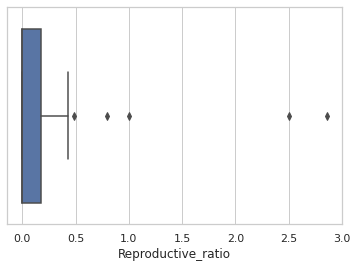

In [61]:

# Measures of Central Tendency
mean1  = x.mean()
median = x.median()
mode   = x.mode()
sns.set(style="whitegrid")
## box plot R0
ax = sns.boxplot(x=Covid_19_cameroon_data["Reproductive_ratio"])
print('Mean: {}'.format(mean1))
print('Median: {}'.format(median))
print('Mode: {}'.format(mode))
print('max: ',x.max())
print('min: ',x.min())
print('Skewness: {}'.format(skew(x)))
#Measures of Dispersion
r=x.max()-x.min()
print('Range: ',r)
#Variance
sigma=np.std(x)
print('Standard Deviation: ',sigma)



<function matplotlib.pyplot.show>

<Figure size 864x576 with 0 Axes>

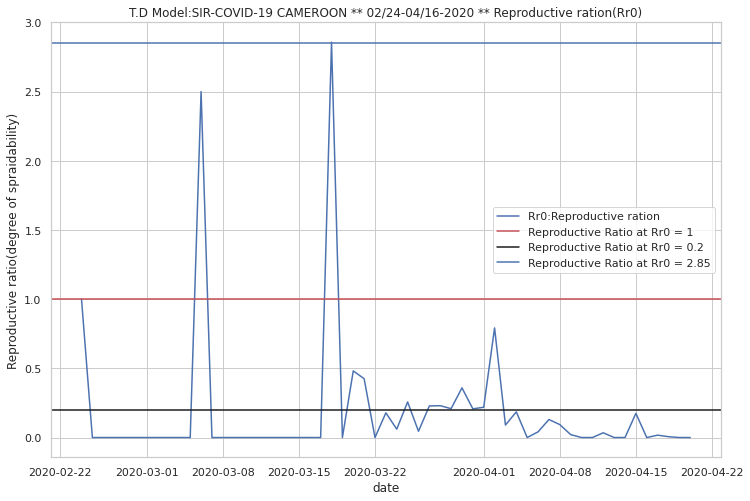

In [62]:
# plot R0
plt.figure(figsize = [12,8])
t= Covid_19_cameroon_data['date']
y= Covid_19_cameroon_data['Reproductive_ratio']
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [12,8])
plt.plot(t, y,label = "Rr0:Reproductive ration")
xcoords = [1, 0.2, 2.85]
# colors for the lines
colors = ['r','k','b']

for xc,c in zip(xcoords,colors):
    plt.axhline(y=xc, label='Reproductive Ratio at Rr0 = {}'.format(xc), c=c)

plt.legend()
plt.xlabel("date")
plt.ylabel("Reproductive ratio(degree of spraidability)")
plt.title("T.D Model:SIR-COVID-19 CAMEROON ** 02/24-04/16-2020 ** Reproductive ration(Rr0)")
plt.show

# Rr0  mean without Rr0/days = 0 

Mean: 0.41705751622217174
Median: 0.19641973579797412
Mode: 0     0.005935
1     0.017068
2     0.021171
3     0.034146
4     0.041033
5     0.045455
6     0.060606
7     0.090373
8     0.093590
9     0.130137
10    0.174528
11    0.178571
12    0.185586
13    0.207254
14    0.208633
15    0.218884
16    0.228261
17    0.230088
18    0.257143
19    0.359155
20    0.425000
21    0.481481
22    0.792254
23    1.000000
24    2.500000
25    2.857143
dtype: float64
max:  2.857142857142857
min:  0.005934718100890208
Skewness: 2.679467280759155
Range:  2.851208139041967
Standard Deviation:  0.6935301367260356


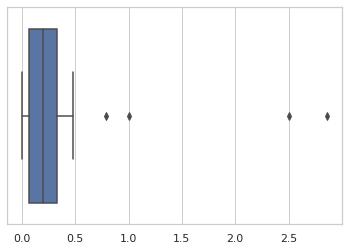

In [66]:

# Measures of Central Tendency
mean2   = x11.mean()
median = x11.median()
mode   = x11.mode()
sns.set(style="whitegrid")
## box plot R0
ax = sns.boxplot(x=x1)
print('Mean: {}'.format(mean2))
print('Median: {}'.format(median))
print('Mode: {}'.format(mode))
print('max: ',x11.max())
print('min: ',x11.min())
print('Skewness: {}'.format(skew(x11)))
#Measures of Dispersion
r=x11.max()-x11.min()
print('Range: ',r)
#Variance
sigma=np.std(x11)
print('Standard Deviation: ',sigma)



<function matplotlib.pyplot.show>

<Figure size 864x576 with 0 Axes>

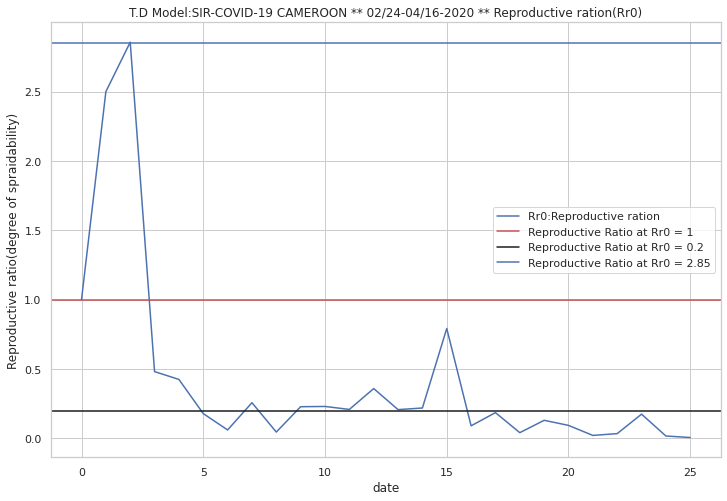

In [67]:
# plot R0
plt.figure(figsize = [12,8])
t= x1.index 
y= x1['Reproductive_ratio_Wout_Zero'] 
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [12,8])
plt.plot(t, y,label = "Rr0:Reproductive ration")
xcoords = [1, 0.2, 2.85]
# colors for the lines
colors = ['r','k','b']

for xc,c in zip(xcoords,colors):
    plt.axhline(y=xc, label='Reproductive Ratio at Rr0 = {}'.format(xc), c=c)

plt.legend()
plt.xlabel("date")
plt.ylabel("Reproductive ratio(degree of spraidability)")
plt.title("T.D Model:SIR-COVID-19 CAMEROON ** 02/24-04/16-2020 ** Reproductive ration(Rr0)")
plt.show

# Serial intervales (SI) :
### Time duration between a primary case-patient (infector) having symptom onset and a secondary case-patient (infectee) having symptom onset (2). 
### Transmission events reported during the early stages of outbreaks
column = ["Event_index","Infector_ID","Infectee ID","City","Province","infection_location","Infector_symptom_onset_date","Age",
"Sex","Secondary_infection location","Seconday_symptom onset date","Seconday_Age","Seconday_Sex","Contact_type",]

# INITIAL CONDITION BEFORE THE GOVERMENT MESURES ON 03-15-2020

In [0]:
# Total population, N.
N = 26390686 
# Initial number of infected and recovered individuals, I0 and R0.
# as of the first declare case in cameroon on 02-24-2020 to 03-20-2020
# Everyone else, S0, is susceptible to infection initially.
I0, R0 = 27, 0  # on 03-20-2020
S0 = N - I0 - R0
# b is 1/number of days it takes to revover from the desease(n)  
# 1/n is the mean period of time during which an infected individual can pass it on.
# we assume it takes in average 15-30 days to recover from Covid-19 in Cameroon
b =  1 / 15
# transmition coefficient with Rr0( daily reproduction rate of COVID-19 cases from 02-24-2020 t0 03-20-2020, Rr0_min = 0
Rr0 = [1.27,2.11,2.85]
#Rr0_av_wthZerodays = 1.27
a0 = ( Rr0[0] * b) / S0
#Rro_av_woutZerodays = 2.11
a1 = ( Rr0[1] * b) / S0
#Rr0_max = 2.85
a2 =  ( Rr0[2] * b) / S0


# TIME VICTOR

In [0]:
# A grid of time points (in days)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].
#The endpoint of the interval can optionally be excluded.
#Changed in version 1.16.0: Non-scalar start and stop are now supported.

t = np.linspace(0, 160, 160)


# Result
# Predict the future S(t),I(t),R(t) before the gorverment measure

In [0]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
solution0 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a0,b))
soluion0  = np.array(solution0)

solution1 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a1,b))
soluion1  = np.array(solution1)

solution2 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a2,b))
soluion2  = np.array(solution2)


# Plot the future S(t),I(t),R(t)

<function matplotlib.pyplot.show>

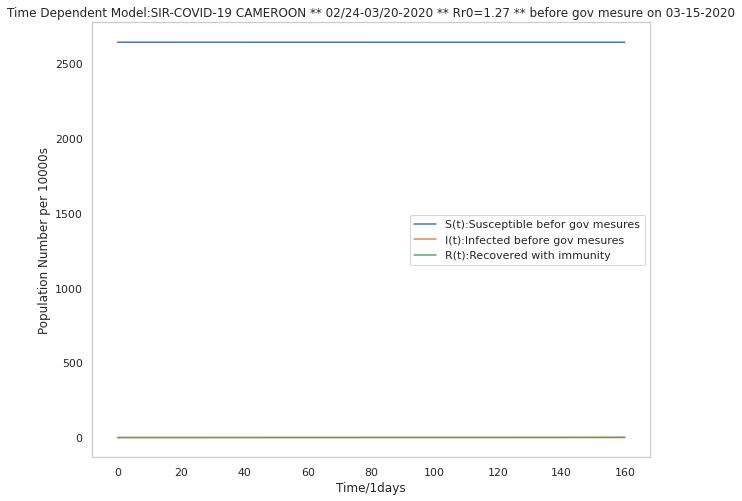

In [71]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution0[:,0]/10000,label = "S(t):Susceptible befor gov mesures")
plt.plot(t, solution0[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution0[:,2]/1000,label = "R(t):Recovered with immunity")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=1.27 ** before gov mesure on 03-15-2020")
plt.show

<function matplotlib.pyplot.show>

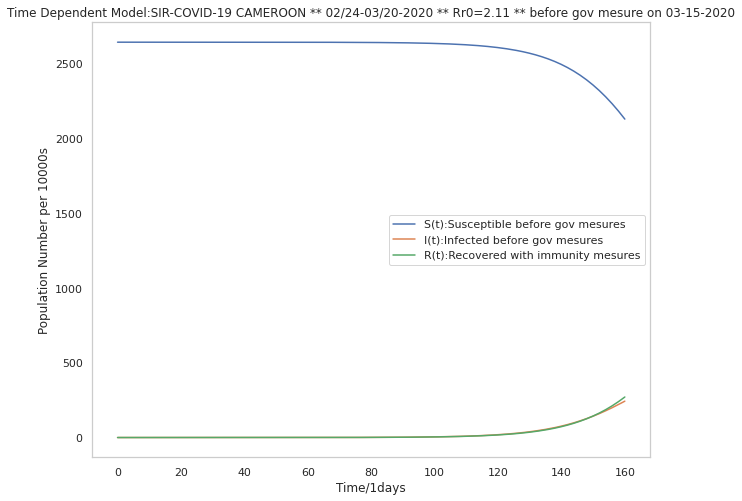

In [72]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution1[:,0]/10000,label = "S(t):Susceptible before gov mesures")
plt.plot(t, solution1[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution1[:,2]/10000,label = "R(t):Recovered with immunity mesures")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=2.11 ** before gov mesure on 03-15-2020")
plt.show

<function matplotlib.pyplot.show>

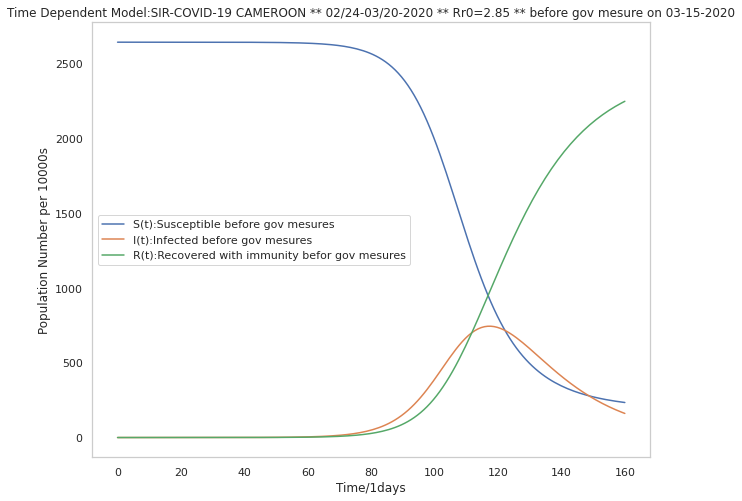

In [74]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution2[:,0]/10000,label = "S(t):Susceptible before gov mesures")
plt.plot(t, solution2[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution2[:,2]/10000,label = "R(t):Recovered with immunity befor gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=2.85 ** before gov mesure on 03-15-2020")
plt.show

# Create Dataframe from the future S(t),I(t),R(t)

In [75]:
Susceptible_population =  pd.Series(solution2[:,0])
Infected_population    =  pd.Series(solution2[:,1])
Removed_population     =  pd.Series(solution2[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.639066e+07,2.700000e+01,0.000000e+00
1,2020-04-18,2.639065e+07,3.056776e+01,1.928519e+00
2,2020-04-19,2.639065e+07,3.460696e+01,4.111872e+00
3,2020-04-20,2.639064e+07,3.917989e+01,6.583730e+00
4,2020-04-21,2.639063e+07,4.435709e+01,9.382218e+00
...,...,...,...,...
155,2020-09-19,2.461153e+06,1.961577e+06,2.196796e+07
156,2020-09-20,2.427262e+06,1.867068e+06,2.209636e+07
157,2020-09-21,2.395440e+06,1.776690e+06,2.221856e+07
158,2020-09-22,2.365550e+06,1.690308e+06,2.233483e+07


# Pair plot the future S(t),I(t),R(t)

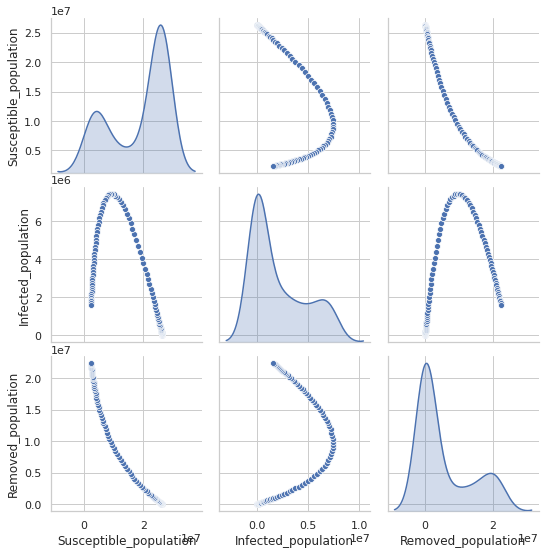

In [76]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

# Joint plot S(t) and I(t)

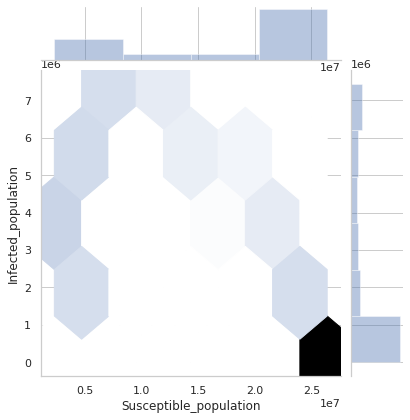

In [77]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# INITIAL CONDITION AFTER THE GOVERMENT MAESURES ON 03-15-2020


####  INITIAL CONDITION DATE: 04-15-2020  #### 
#### Cameroon Coronavirus Cases:848 Deaths:17 Recovered:165  source:http://apanews.net/en/pays/cameroun/news/cameroons-health-ministry-stops-daily-covid-19-reports####

In [0]:
# Total population, N.
N = 26390686 
# Initial number of infected and recovered individuals, I0 and R0.
# as of the last declare case in cameroon on 04-15-2020
# Everyone else, S0, is susceptible to infection initially.
# b is 1/number of days it takes to revover from the desease(n)  
# 1/n is the mean period of time during which an infected individual can pass it on.
# we assume it takes in average 15 days to recover from Covid-19 in Cameroon
b =  1/15
I0, R0 = 1017,347  # on 04-20-2020 ## source: https://www.worldometers.info/coronavirus/country/cameroon/
S0 = N - I0 - R0
# transmition coefficient with Rr0( daily reproduction rate of COVID-19 cases from 02-24-2020 t0 03-20-2020, Rr0_min = 0
Rr0 = [mean2,mean1]
#Rr0_av_wthZerodays 
a3 =  ( Rr0[0] * b) / S0
#Rro_av_woutZerodays = 
a4 =  ( Rr0[1] * b) / S0

# Result
# Predict the future S(t),I(t),R(t) after the gorverment measure

In [0]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
solution3 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a3,b))
soluion3  = np.array(solution3)

solution4 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a4,b))
soluion4  = np.array(solution4)


# Plot the future S(t),I(t),R(t)

<function matplotlib.pyplot.show>

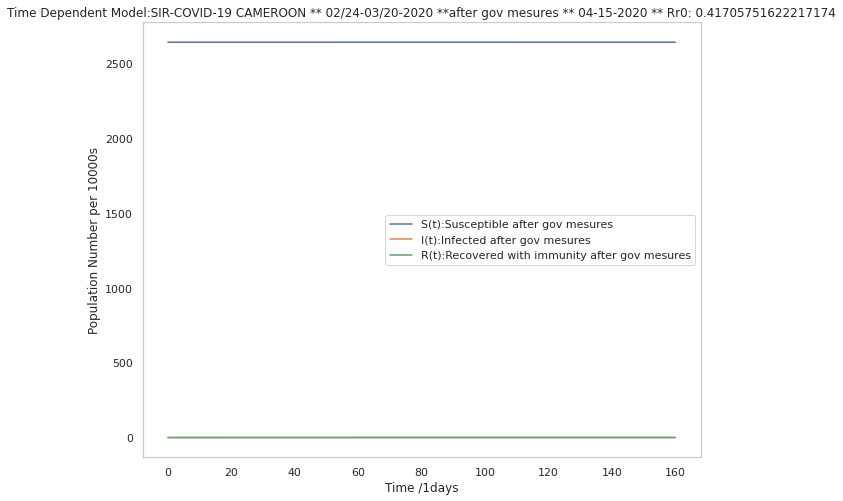

In [99]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution3[:,0]/10000,label = "S(t):Susceptible after gov mesures")
plt.plot(t, solution3[:,1]/10000,label = "I(t):Infected after gov mesures")
plt.plot(t, solution3[:,2]/10000,label = "R(t):Recovered with immunity after gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time /1days")
plt.ylabel("Population Number per 10000s")
plt.title('Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 **after gov mesures ** 04-15-2020 ** Rr0: {}'.format(mean2))
plt.show


# Create Dataframe from the future S(t),I(t),R(t)

In [100]:
Susceptible_population =  pd.Series(solution3[:,0])
Infected_population    =  pd.Series(solution3[:,1])
Removed_population     =  pd.Series(solution3[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.638932e+07,1017.000000,347.000000
1,2020-04-18,2.638929e+07,977.995556,413.909568
2,2020-04-19,2.638927e+07,940.487003,478.252984
3,2020-04-20,2.638924e+07,904.416971,540.128670
4,2020-04-21,2.638922e+07,869.730291,599.631267
...,...,...,...,...
155,2020-09-19,2.638860e+07,2.369996,2087.514799
156,2020-09-20,2.638860e+07,2.279099,2087.670724
157,2020-09-21,2.638860e+07,2.191689,2087.820668
158,2020-09-22,2.638860e+07,2.107630,2087.964862


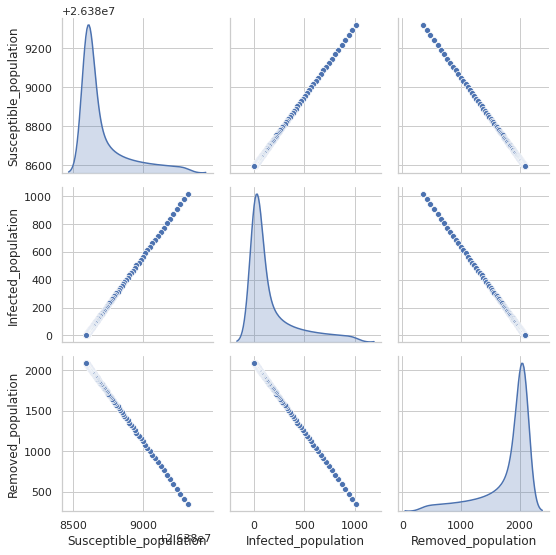

In [101]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

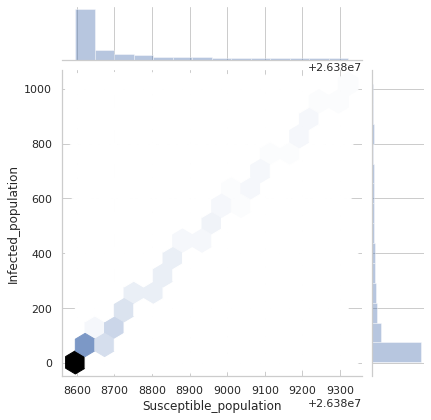

In [102]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# Plot the future S(t),I(t),R(t)




<function matplotlib.pyplot.show>

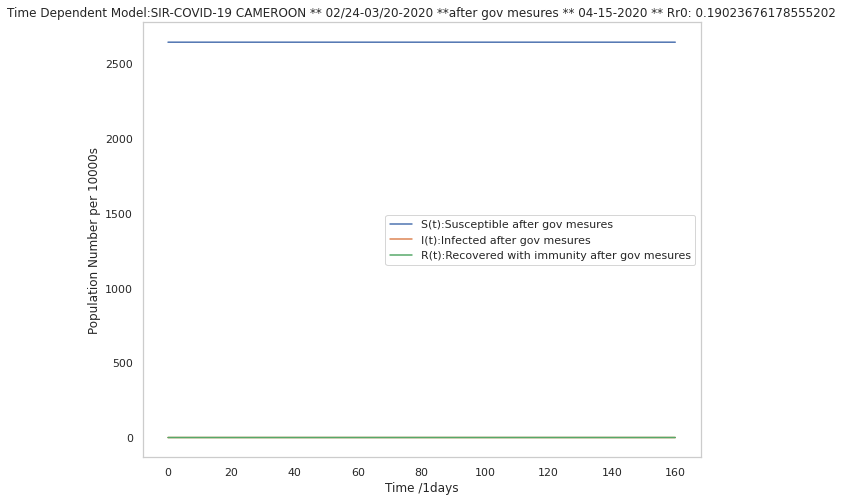

In [103]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution4[:,0]/10000,label = "S(t):Susceptible after gov mesures")
plt.plot(t, solution4[:,1]/10000,label = "I(t):Infected after gov mesures")
plt.plot(t, solution4[:,2]/10000,label = "R(t):Recovered with immunity after gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time /1days")
plt.ylabel("Population Number per 10000s")
plt.title('Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 **after gov mesures ** 04-15-2020 ** Rr0: {}'.format(mean1))
plt.show

In [104]:
Susceptible_population =  pd.Series(solution4[:,0])
Infected_population    =  pd.Series(solution4[:,1])
Removed_population     =  pd.Series(solution4[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.638932e+07,1017.000000,347.000000
1,2020-04-18,2.638931e+07,963.226569,413.406359
2,2020-04-19,2.638930e+07,912.296375,476.301515
3,2020-04-20,2.638929e+07,864.059086,535.871120
4,2020-04-21,2.638928e+07,818.372323,592.291002
...,...,...,...,...
155,2020-09-19,2.638908e+07,0.224118,1602.644555
156,2020-09-20,2.638908e+07,0.212268,1602.659189
157,2020-09-21,2.638908e+07,0.201044,1602.673049
158,2020-09-22,2.638908e+07,0.190414,1602.686177


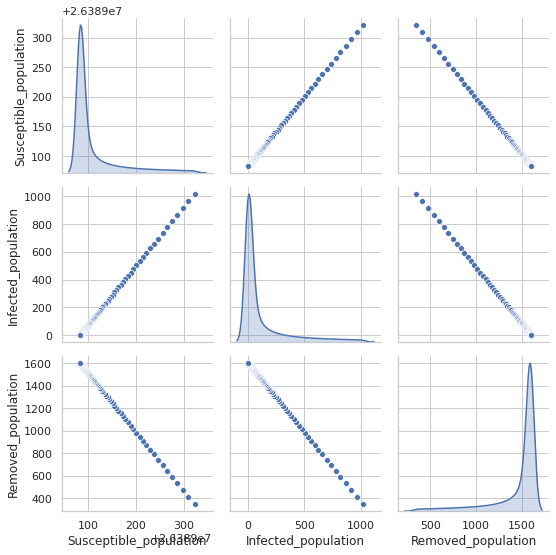

In [105]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

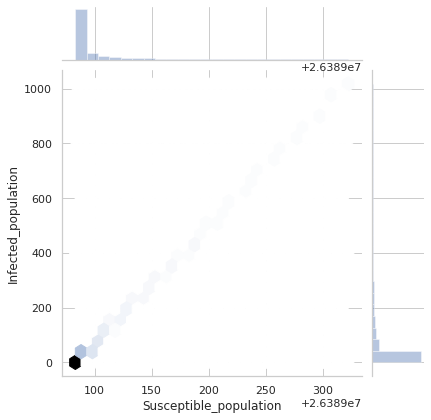

In [106]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# infection threshold
The number of susceptible population for infection rate to be zero(changing from a positive infection to negative infection)
dI/dt = 0

In [107]:
print ("Infection threshold for Rr0 = 1.27 is :",b/a0)
print ("Infection threshold for Rr0 = 2.11  is :",b/a1)
print ("Infection threshold for Rr0 = 2.85 is :",b/a2)


Infection threshold for Rr0 = 1.27 is : 20780046.45669291
Infection threshold for Rr0 = 2.11  is : 12507421.327014219
Infection threshold for Rr0 = 2.85 is : 9259880.350877192


# To significantly slow the spread of the disease (dI/dt < 0) after DAY(0) Governemt measure was put in place to reduce the chance of contacting the disease(COVID-19) by factor of (k)

# How those the threshold change in this situation

In [108]:
# a_new: new transmition coefficient
# b_new: new recovered rate(do not change most of the time with preventive mesure)
k = 2.5
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 1.27 by factor of 20 is:", k * (b/a0))
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 2.11 by factor of 20 is:", k * (b/a1))
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 2.85 by factor of 20 is:", k * (b/a2))

the new threshold to reduce the chance of contacting COVID-19-Rr = 1.27 by factor of 20 is: 51950116.141732275
the new threshold to reduce the chance of contacting COVID-19-Rr = 2.11 by factor of 20 is: 31268553.31753555
the new threshold to reduce the chance of contacting COVID-19-Rr = 2.85 by factor of 20 is: 23149700.87719298


# How many people will catch COVID19 in Cameroon

We want COVID19 to end **dI/dt = 0 = end **

Send - 1/2*ln(Send) = I0 + S0 - 1/q * ln(S0)  

Rend = -Send + I0 + S0(Rend = death + recovered)

**q: Contact ratio**

# wat all this mean for COVID19 cameroon
**Spread of the virus in Cameroon** : Rro = q * S0 > 1 

**Maximun infected populations :** Total population -f(q)

**How many people will catch the COVID-19 in Cameroon:** Total population - g(q)

**q: contact ration**

# SIR TRAVELLING WAVE CAVID-19 MODEL- CAMEROON(Population Change over Space)

# Assumption to the Model
1 - susceptible do not move 

2 - Infected going to migrate at constant rate

3 - Recorvered or Removed population do not move 

WAVE MODEL IS FOCUST ON I(t)
#### 0 = C * dS/dy - I*S ####
#### 0 = (d^2 )I/ d(y^2) + C * dI/dy + I  * (S-1/R0)   with  y = x - C * t ####

# WHAT IS THE WAVE SPEED OF COVID-19 IN CAMEROON UP TO 04-15-2020
Rr0 = S0 * q with q = a / b

For tavelling wave solution to exist the minimum require wave speed is 2 * rms(1-1/R0)
#### Cmin = 2 * rms(1-1/R0)  ####
#### C is the speed of travelling wave also the speed of COVID-19 as it propagate throught the population. For COVID-19, the speed of spraid C should be minimum as posible to slow dow the propagation of the virus throught the population. We can make C small by making  R0 small  PROVIDED THAT R0 > 1 


In [94]:

Rr0 = Rr0
Speed_of_the_spraid_of_COVID19 = 2 * np.sqrt( 1 - (1/Rr0 ))

if (Rr0 < 1):
    print("the speed of the spraid of COVID-19 in CAMEROON is : do not exit because Rro < 1 ")
else :
    print (" the speed of the spraid of COVID-19 in CAMEROON is : ",Speed_of_the_spraid_of_COVID19)


the speed of the spraid of COVID-19 in CAMEROON is : do not exit because Rro < 1 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


# WHAT IS THE SEVERITY OF COVID-19 IN CAMEROON AS OF 04-15-2020
If we get how many people was left after the disease we can get how many was actualy affected
#### What is the number of Susceptible (S) left at the end of the COVID-19 outbrake 
Rend  = -Send + I0 + S0

Send - 1/q * ln(Send) = I0 + S0 - 1/q * ln(S0)

I + S - 1/q * ln(S) = I0 + S0 - 1/q * ln(S0)

#### Send - 1/Rr.0 * ln *(Send) = 1 
#### The best way to deal with implicit equation is to plot a gragh to find the relationship between Send and Rr0.  Send = f(Rr0)


In [109]:
data = { 'Send': [1, 0.8, 0.6,0.2, 0.1, 0.05, 0.03, 0.01, 0],'Rr0': [1, 1.25,  1.35, 1.50, 1.75, 2.25, 2.75, 2.85, 3] }
data = pd.DataFrame(data)
data


,Send,Rr0
0,1.00,1.00
1,0.80,1.25
2,0.60,1.35
3,0.20,1.50
4,0.10,1.75
5,0.05,2.25
6,0.03,2.75
7,0.01,2.85
8,0.00,3.00


<function matplotlib.pyplot.show>

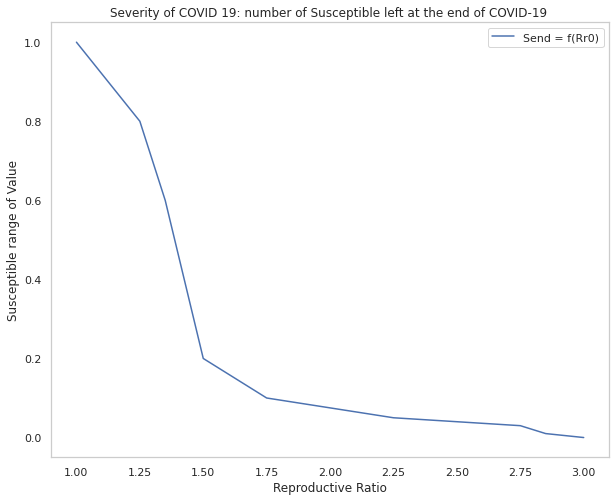

In [110]:
plt.figure(figsize = [10,8])
plt.plot(data['Rr0'], data['Send'],label = "Send = f(Rr0)")
plt.grid()
plt.legend()
plt.xlabel("Reproductive Ratio")
plt.ylabel("Susceptible range of Value")
plt.title("Severity of COVID 19: number of Susceptible left at the end of COVID-19 ")
plt.show

**conclusion**

In Cameroon, the data collected on the first 1011 people diagnosed with COVID19 as of 04-19-2020 show that, the pendemic did not start yet because the reproductive ratio(Rro) is less than one (**Rr0 < 1**) and the transmission coefficient or contact ratio is very small( **a** is very small). 

We can conclud that the Goverment Measures put in place on 03-15-2020 to lower the tansmission coefficient or contact ratio to significantly slow down COVID19 works according to the public available data published by the Cameroon's minister of health   